In [15]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
dataset = pd.read_csv('new_churn_data.csv')

In [17]:
user_identifier = dataset['user']

In [18]:
dataset = dataset.drop(columns = ['user'])

원-핫 인코딩

In [19]:
dataset.housing.value_counts()
dataset = pd.get_dummies(dataset)

In [20]:
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [21]:
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns='churn'),
                                                                 dataset['churn'],
                                                                 test_size = 0.2,
                                                                 random_state = 0)

Balancing the Training Set

In [23]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

In [24]:
if len(pos_index) > len(neg_index):
  higher = pos_index
  lower = neg_index
else:
  lower = pos_index
  higher = neg_index

In [27]:
random.seed(0)
higher = np.random.choice(higher, size = len(lower)) # e.g. lower가 100이고 higher가 900이면 higher에서 100(lower의 크기)만큼만 뽑음
lower = np.asarray(lower)
new_indexes = np.concatenate((lower,higher)) # e.g. 100+100=200으로 균형 맞음

X_train = X_train.loc[new_indexes,] # 균형 맞춘 데이터만 남김
y_train = y_train[new_indexes]

Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Model Building

In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

Predicting Test Set

In [37]:
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Evaluating Results

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.6396296296296297

In [39]:
precision_score(y_test, y_pred)

0.6343283582089553

In [40]:
recall_score(y_test, y_pred)

0.3043867502238138

In [41]:
f1_score(y_test, y_pred)

0.411373260738052

Test Data Accuracy: 0.6396


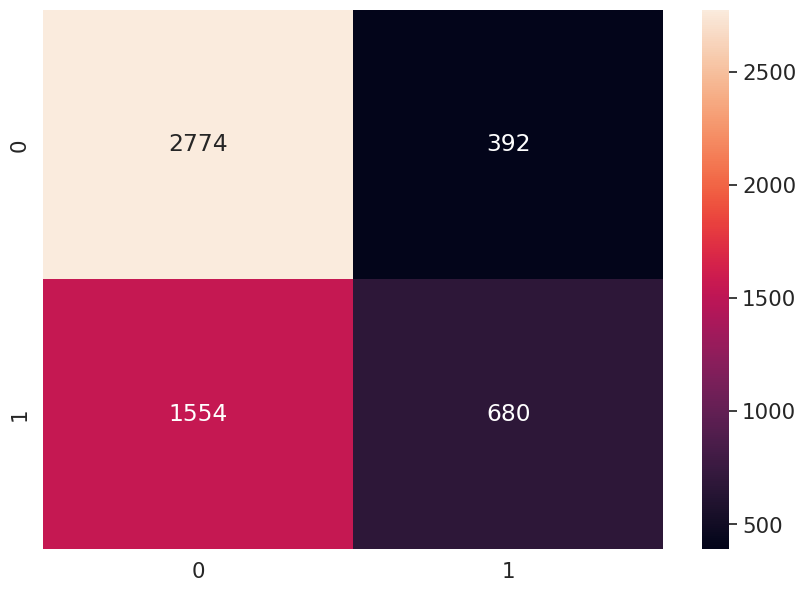

In [45]:
df_cm = pd.DataFrame(cm, index = (0,1), columns = (0,1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

Applying k-Fold Cross Validation

In [48]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                            X = X_train,
                            y = y_train,
                            cv = 10)

In [49]:
accuracies

array([0.6731405 , 0.68595041, 0.66239669, 0.66570248, 0.66487603,
       0.66157025, 0.66804465, 0.66639107, 0.66391071, 0.67631253])

In [50]:
accuracies.mean()

np.float64(0.6688295313615693)

In [52]:
pd.concat([pd.DataFrame(X_train.columns, columns=["features"]),
                        pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])],
          axis = 1)

,features,coef
0,age,-0.198996
1,deposits,-0.088555
2,withdrawal,0.058930
3,purchases_partners,-0.744920
4,purchases,-0.082301
5,cc_taken,0.079424
6,cc_recommended,0.112247
7,cc_disliked,-0.018662
8,cc_liked,-0.031366
9,cc_application_begin,0.017074


Feature Selection (특성의 개수 줄이기)

In [55]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
rfe = RFE(estimator=classifier, n_features_to_select=20) # 20개가 남을 때까지 중요한 변수만 남기고 제거
rfe = rfe.fit(X_train, y_train)

In [56]:
print(rfe.support_)

[ True  True  True  True  True  True  True False False False  True  True
  True  True  True False  True  True  True False  True  True False False
  True False False False  True False False False False False False False
 False False  True False False]


In [57]:
print(X_train.columns[rfe.support_])

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'cancelled_loan', 'received_loan',
       'rejected_loan', 'left_for_one_month', 'reward_rate', 'housing_R',
       'payment_type_Weekly', 'zodiac_sign_Scorpio'],
      dtype='object')


In [58]:
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1,  1, 12,  6, 11,  1,  1,  1,  1,  1, 22,  1,
        1,  1,  8,  1,  1, 19, 21,  1, 17, 10,  5,  1, 18,  4,  2,  3,  7,
        9, 13, 20, 16,  1, 14, 15])

In [62]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train.iloc[:, rfe.support_], y_train) # 더 적은 특성 사용

y_pred = classifier.predict(X_test.iloc[:, rfe.support_])
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6331481481481481

In [63]:
precision_score(y_test, y_pred)

0.6219864995178399

In [64]:
recall_score(y_test, y_pred)

0.28871978513876456

In [65]:
f1_score(y_test, y_pred)

0.39437480892693366

In [66]:
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns=["features"]),
                        pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])],
          axis = 1)

,features,coef
0,age,-0.200804
1,deposits,-0.087472
2,withdrawal,0.062023
3,purchases_partners,-0.737892
4,purchases,-0.082351
5,cc_taken,0.069517
6,cc_recommended,0.120217
7,app_downloaded,-0.059957
8,web_user,0.158948
9,ios_user,0.109230


In [69]:
final_results = pd.concat([y_test, user_identifier], axis=1).dropna()
final_results['predicted_churn'] = y_pred
final_reults = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)

In [70]:
final_results

,churn,user,predicted_churn
2834,1.0,53016,0
21018,0.0,54963,0
5590,0.0,10511,0
15769,0.0,64269,0
15120,0.0,30978,0
...,...,...,...
16090,1.0,50513,0
9851,0.0,42775,0
654,1.0,15284,1
26248,1.0,10432,0
